[*********************100%***********************]  1 of 1 completed

Epoch 1/100


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3073e-04
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0866e-04
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.5691e-05
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.4878e-05
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6628e-05
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6560e-05
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0184e-05
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9104e-05
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6079e-05
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2252e-05
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7552e-05
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.7361e-05
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3719e-05
Epoch 15/100
31/31 ━━━━━━━━━━━━

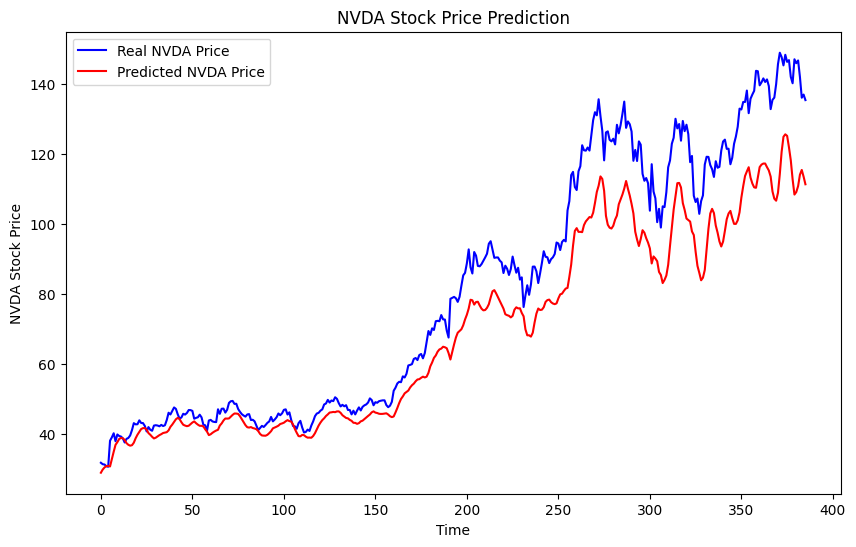

In [8]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Download historical price data from Yahoo Finance
ticker = "NVDA"
start_date = "2019-01-01"
end_date = "2024-12-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Select closing prices
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Function to create datasets for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # past `time_step` values
        y.append(data[i + time_step, 0])  # next day's value
    return np.array(X), np.array(y)

# Split the data into training and testing sets (70% training, 30% testing)
train_size = int(len(prices_scaled) * 0.7)
train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]

# Create the training and testing datasets
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input to be 3D (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')

# Predict closing prices
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Denormalize the predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train_unscaled = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize the results (Optional, requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, color='blue', label='Real NVDA Price')
plt.plot(test_predictions, color='red', label='Predicted NVDA Price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NVDA Stock Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed

Epoch 1/100


20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050
Epoch 1: val_loss improved from inf to 0.00016, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0045 - val_loss: 1.6136e-04
Epoch 2/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2293e-04
Epoch 2: val_loss improved from 0.00016 to 0.00009, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9781e-04 - val_loss: 8.8790e-05
Epoch 3/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.5677e-05
Epoch 3: val_loss improved from 0.00009 to 0.00007, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4439e-05 - val_loss: 6.8220e-05
Epoch 4/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8556e-05
Epoch 4: val_loss improved from 0.00007 to 0.00007, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0256e-05 - val_loss: 6.5130e-05
Epoch 5/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.1577e-05
Epoch 5: 

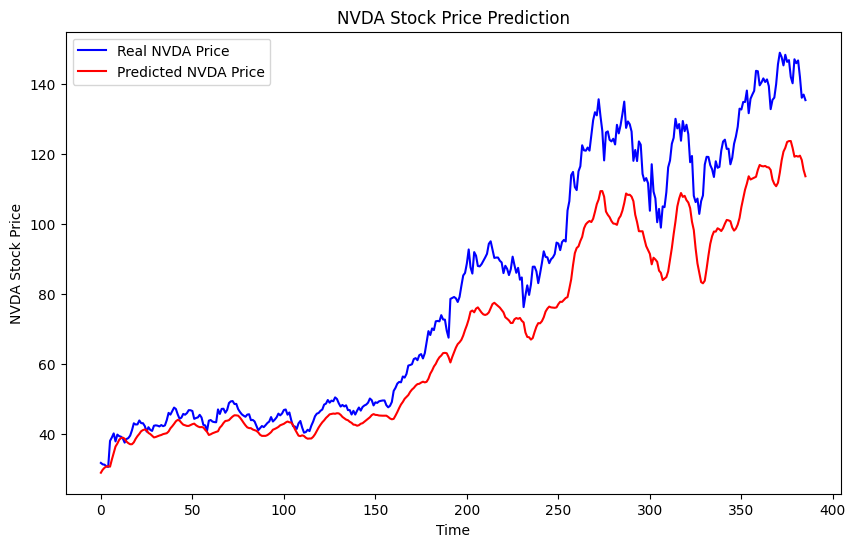

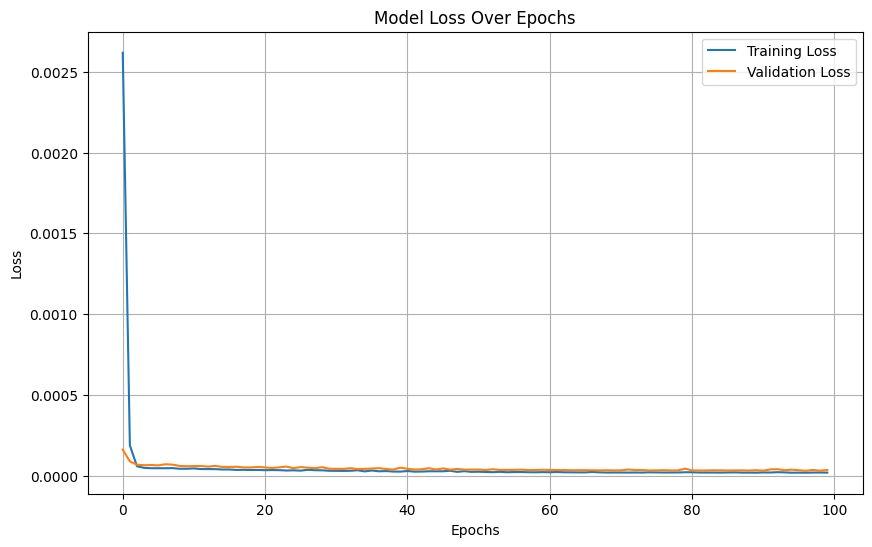

In [13]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
import matplotlib.pyplot as plt

# Download historical price data from Yahoo Finance
ticker = "NVDA"
start_date = "2019-01-01"
end_date = "2024-12-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Select closing prices
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Function to create datasets for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # past `time_step` values
        y.append(data[i + time_step, 0])  # next day's value
    return np.array(X), np.array(y)

# Split the data into training and testing sets (70% training, 30% testing)
train_size = int(len(prices_scaled) * 0.7)
train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]

# Create the training and testing datasets
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input to be 3D (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
csv_logger = CSVLogger('training_log.csv', append=True)

# Train the model with validation split
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[checkpoint, early_stopping, csv_logger],
    verbose=1
)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')

# Predict closing prices
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Denormalize the predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train_unscaled = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, color='blue', label='Real NVDA Price')
plt.plot(test_predictions, color='red', label='Predicted NVDA Price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NVDA Stock Price')
plt.legend()
plt.show()

# Visualize loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2019-01-02,3.378090,3.405500,3.462000,3.251250,3.266000,508752000
2019-01-03,3.173996,3.199750,3.379000,3.192250,3.344750,705552000
2019-01-04,3.377346,3.404750,3.443250,3.242500,3.273500,585620000
2019-01-07,3.556145,3.585000,3.622250,3.410750,3.462500,709160000
2019-01-08,3.467613,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...
2024-11-22,141.940216,141.949997,147.160004,141.100006,145.929993,236406200
2024-11-25,136.010635,136.020004,142.050003,135.820007,141.990005,344941900


[*********************100%***********************]  1 of 1 completed

Epoch 1/200


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0046 - val_loss: 1.6329e-04
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - val_loss: 1.1848e-04
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3899e-04 - val_loss: 1.3174e-04
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7535e-05 - val_loss: 1.0158e-04
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.6340e-05 - val_loss: 9.5163e-05
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1409e-05 - val_loss: 9.7158e-05
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7281e-05 - val_loss: 9.2164e-05
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6110e-05 - val_loss: 8.9485e-05
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1753e-05 - val_loss: 1.1524e-04
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7685e-05 - val_loss: 7.9398e-05
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6786e-05 - val_loss: 1.115

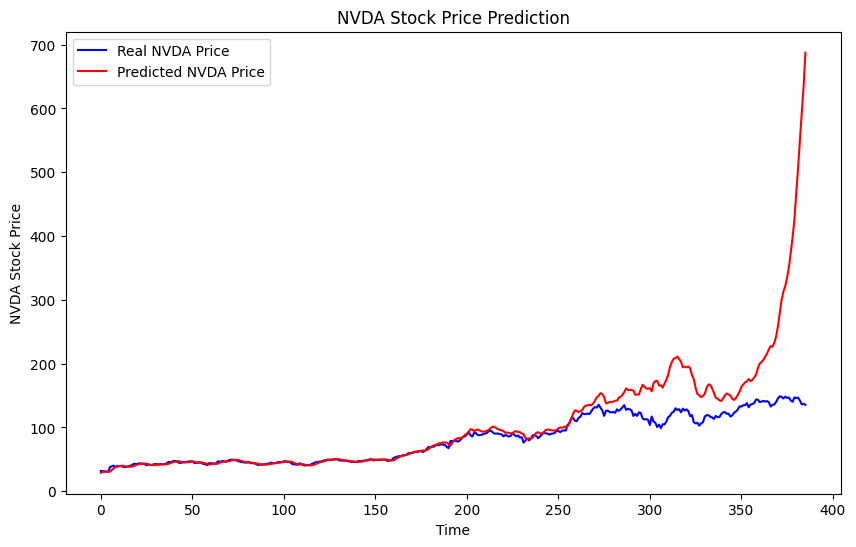

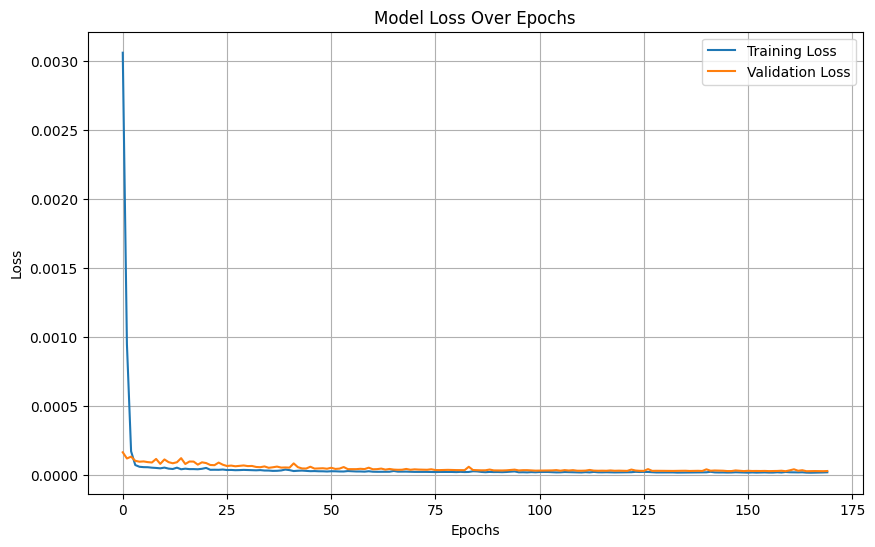

In [10]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

# Download historical price data from Yahoo Finance
ticker = "NVDA"
start_date = "2019-01-01"
end_date = "2024-12-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Select closing prices
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Function to create datasets for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # past `time_step` values
        y.append(data[i + time_step, 0])  # next day's value
    return np.array(X), np.array(y)

# Split the data into training and testing sets (70% training, 30% testing)
train_size = int(len(prices_scaled) * 0.7)
train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]

# Create the training and testing datasets
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input to be 3D (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

csv_logger = CSVLogger('NVDA_training_log.csv', append=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping, csv_logger],
    verbose=1
)
# Callbacks for logging, early stopping, and model checkpointing
csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    filepath='../models/nvda_best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,  # Set to True if saving weights only
    mode='min',  # 'min' for loss metrics, 'max' for accuracy metrics
    verbose=1
)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')

# Predict closing prices
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Denormalize the predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train_unscaled = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize the results (Optional, requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, color='blue', label='Real NVDA Price')
plt.plot(test_predictions, color='red', label='Predicted NVDA Price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NVDA Stock Price')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



[*********************100%***********************]  1 of 1 completed
/Users/rongfan/Documents/GitHub/SmartTrader/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0042
Epoch 1: val_loss improved from inf to 0.00498, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0043 - val_loss: 0.0050
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0044
Epoch 2: val_loss improved from 0.00498 to 0.00475, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0042
Epoch 3: val_loss improved from 0.00475 to 0.00454, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0039
Epoch 4: val_loss improved from 0.00454 to 0.00433, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0037
Epoch 5: val_loss improved from 0

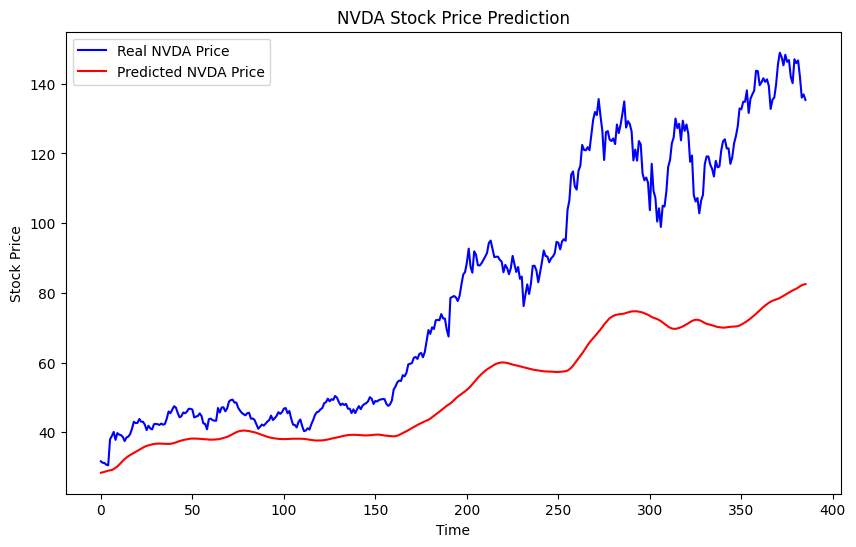

     epoch      loss  val_loss
207    195  0.000051  0.000073
208    196  0.000054  0.000073
209    197  0.000050  0.000073
210    198  0.000049  0.000073
211    199  0.000049  0.000073


In [9]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
import matplotlib.pyplot as plt

# Download historical price data from Yahoo Finance
ticker = "NVDA"
start_date = "2019-01-01"
end_date = "2024-12-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Select features (Close and Volume)
features = data[['Close', 'Volume']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Function to create datasets for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 0])  # Predicting Close price
    return np.array(X), np.array(y)

# Split the data into training and testing sets (70% training, 30% testing)
train_size = int(len(features_scaled) * 0.7)
train_data, test_data = features_scaled[:train_size], features_scaled[train_size:]

# Create the training and testing datasets
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input to be 3D (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build the fine-tuned LSTM model
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dense(1)
])

# Compile the model with Adam optimizer and Huber loss
model.compile(optimizer=Adam(learning_rate=1e-5), loss=Huber())

# Callbacks for logging, early stopping, and model checkpointing
csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,  # Set to True if saving weights only
    mode='min',  # 'min' for loss metrics, 'max' for accuracy metrics
    verbose=1
)


# Train the model with validation split and logging
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Creates a validation set automatically
    epochs=200,
    batch_size=64,
    callbacks=[csv_logger, early_stopping, checkpoint],
    verbose=1
)


# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')

# Predict closing prices
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Denormalize the predictions
train_predictions_unscaled = scaler.inverse_transform(
    np.hstack((train_predictions, np.zeros((train_predictions.shape[0], features.shape[1] - 1)))))
y_train_unscaled = scaler.inverse_transform(
    np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], features.shape[1] - 1)))))[:, 0]
test_predictions_unscaled = scaler.inverse_transform(
    np.hstack((test_predictions, np.zeros((test_predictions.shape[0], features.shape[1] - 1)))))
y_test_unscaled = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], features.shape[1] - 1)))))[:, 0]

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, color='blue', label='Real NVDA Price')
plt.plot(test_predictions_unscaled[:, 0], color='red', label='Predicted NVDA Price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Log training metrics
import pandas as pd
training_log = pd.read_csv('training_log.csv')
print(training_log.tail())


[*********************100%***********************]  1 of 1 completed

Epoch 1/100


24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031
Epoch 1: val_loss improved from inf to 0.00053, saving model to bidirectional_lstm_best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0030 - val_loss: 5.3308e-04 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.5005e-04
Epoch 2: val_loss improved from 0.00053 to 0.00023, saving model to bidirectional_lstm_best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.4952e-04 - val_loss: 2.3013e-04 - learning_rate: 0.0010
Epoch 3/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.0293e-04
Epoch 3: val_loss improved from 0.00023 to 0.00022, saving model to bidirectional_lstm_best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.0099e-04 - val_loss: 2.2134e-04 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.9795e-04
Epoch 4: val_loss did not improve from 0.00022
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.9747e-04 - va

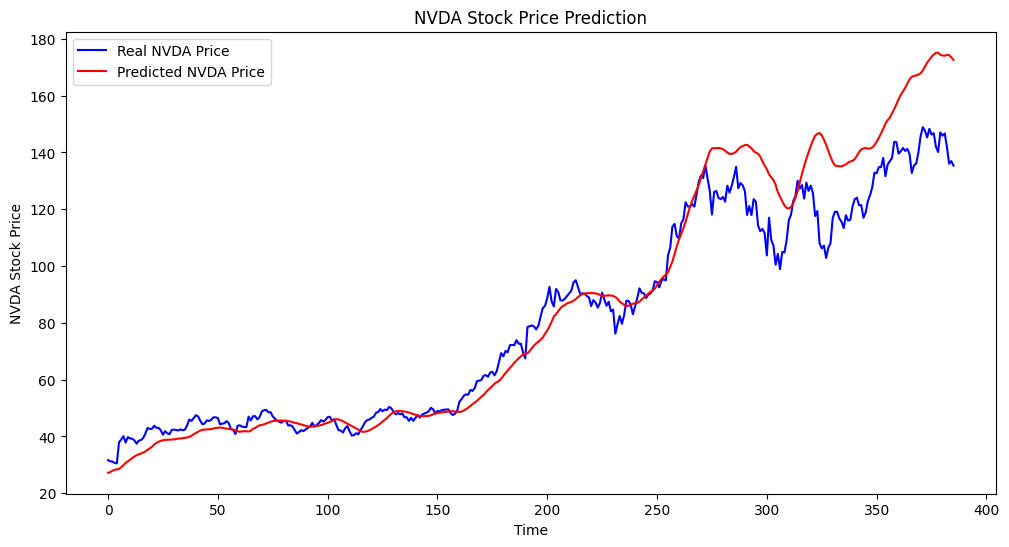

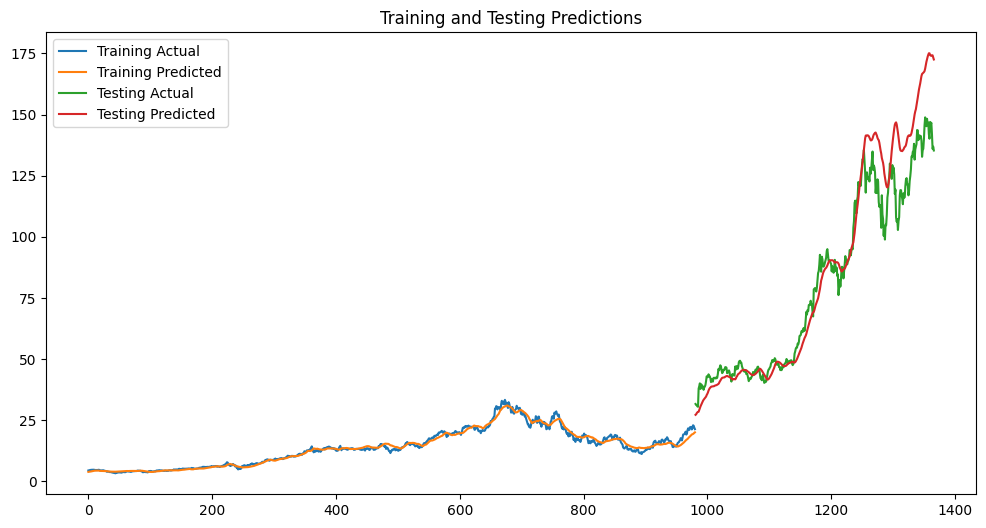

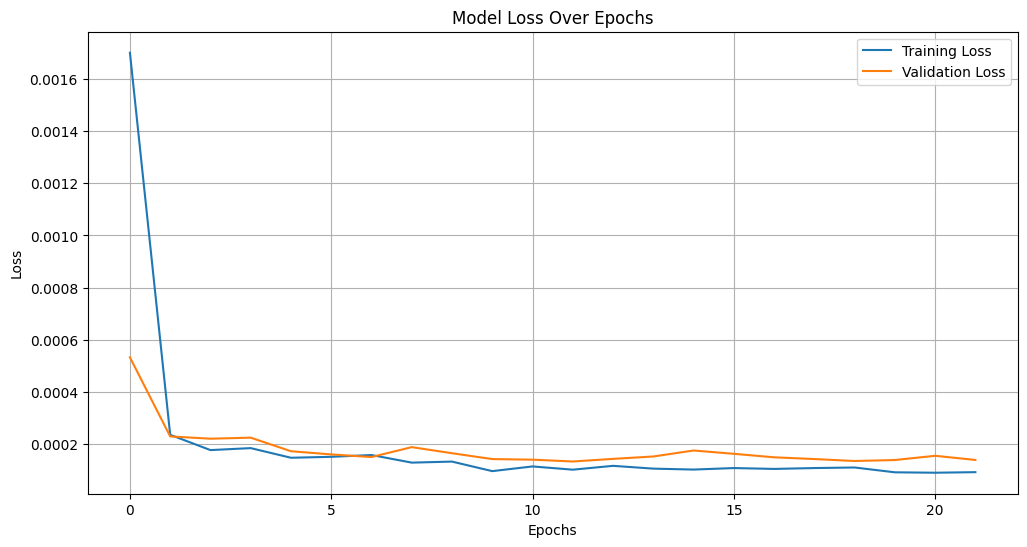

In [16]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Download historical price data from Yahoo Finance
ticker = "NVDA"
start_date = "2019-01-01"
end_date = "2024-12-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Select features (Closing price and others)
features = data[['Close', 'Open', 'High', 'Low', 'Volume']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Function to create datasets for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])  # past `time_step` values for all features
        y.append(data[i + time_step, 0])  # next day's closing price
    return np.array(X), np.array(y)

# Split the data into training and testing sets (70% training, 30% testing)
train_size = int(len(features_scaled) * 0.7)
train_data, test_data = features_scaled[:train_size], features_scaled[train_size:]

# Create the training and testing datasets
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input to be 3D (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build the improved LSTM model with Dropout and Bidirectional layers
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(50, activation='relu', return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50, activation='relu')),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks
checkpoint = ModelCheckpoint(
    filepath='bidirectional_lstm_best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
csv_logger = CSVLogger('training_log.csv', append=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model with validation split
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[checkpoint, early_stopping, csv_logger, reduce_lr],
    verbose=1
)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')

# Predict closing prices
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Denormalize the predictions
scaler_price = MinMaxScaler(feature_range=(0, 1))
scaler_price.min_, scaler_price.scale_ = scaler.min_[0], scaler.scale_[0]  # Extract closing price scaling
train_predictions = scaler_price.inverse_transform(train_predictions)
y_train_unscaled = scaler_price.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler_price.inverse_transform(test_predictions)
y_test_unscaled = scaler_price.inverse_transform(y_test.reshape(-1, 1))

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, color='blue', label='Real NVDA Price')
plt.plot(test_predictions, color='red', label='Predicted NVDA Price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NVDA Stock Price')
plt.legend()
plt.show()

# Visualize training vs testing predictions
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train_unscaled)), y_train_unscaled, label='Training Actual')
plt.plot(np.arange(len(train_predictions)), train_predictions, label='Training Predicted')
plt.plot(np.arange(len(y_train_unscaled), len(y_train_unscaled) + len(y_test_unscaled)), y_test_unscaled, label='Testing Actual')
plt.plot(np.arange(len(y_train_unscaled), len(y_train_unscaled) + len(test_predictions)), test_predictions, label='Testing Predicted')
plt.title('Training and Testing Predictions')
plt.legend()
plt.show()

# Visualize loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
